In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('/profiles.csv', engine='python', error_bad_lines=False)

#Exploratory analysis and visualization

print(df.body_type.isna().value_counts())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 31802: unexpected end of data


False    29033
True      2767
Name: body_type, dtype: int64


In [37]:
print(df.body_type.value_counts())

print(df.body_type.value_counts(normalize = True))

average           7724
fit               6761
athletic          6379
thin              2465
curvy             2015
a little extra    1390
skinny             953
full figured       551
overweight         257
jacked             230
used up            190
rather not say     118
Name: body_type, dtype: int64
average           0.266042
fit               0.232873
athletic          0.219715
thin              0.084903
curvy             0.069404
a little extra    0.047877
skinny            0.032825
full figured      0.018978
overweight        0.008852
jacked            0.007922
used up           0.006544
rather not say    0.004064
Name: body_type, dtype: float64


In [38]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

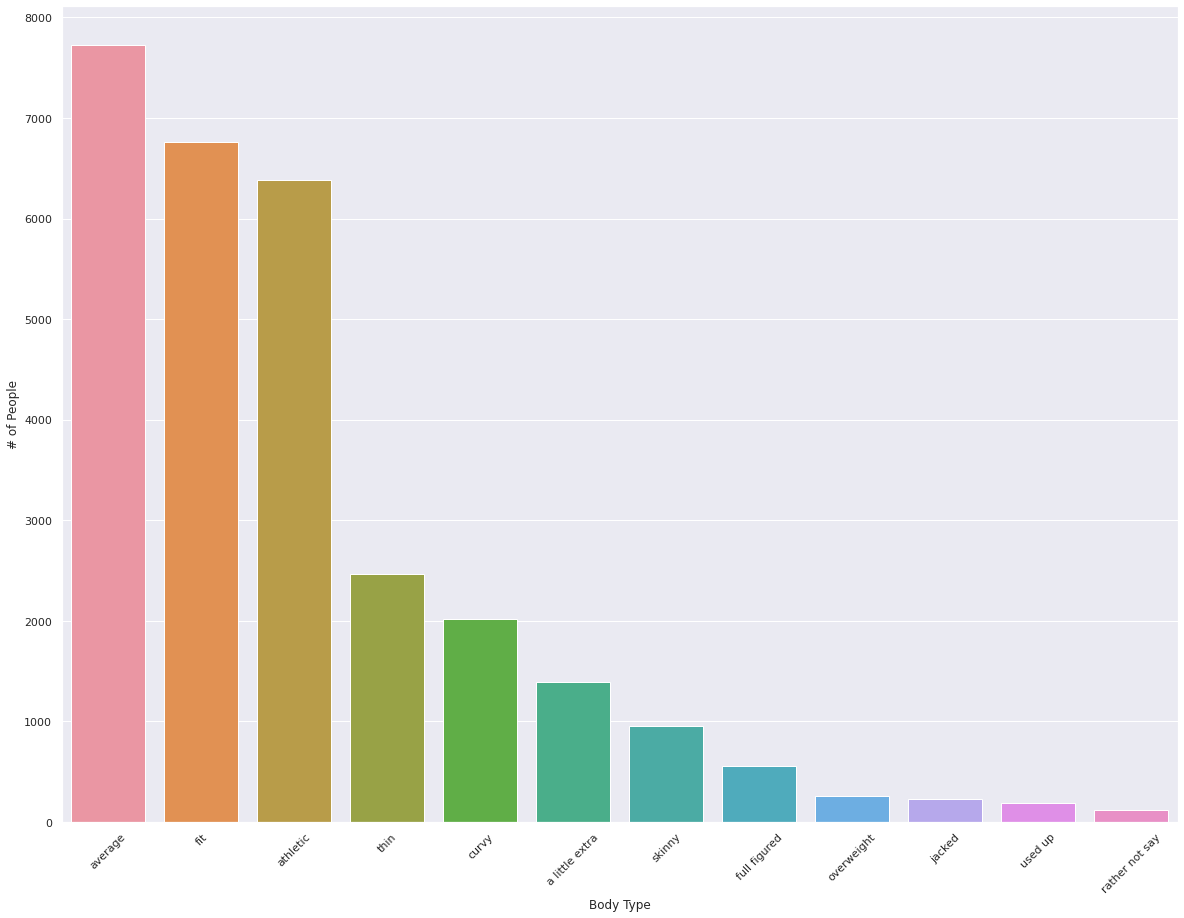

In [39]:
ax = sns.countplot(x = df.body_type, data = df, order = df['body_type'].value_counts().index)
sns.set_theme(style="darkgrid")
ax.set(xlabel='Body Type', ylabel='# of People')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=45)
plt.show()

The majority of users self-identify as either "average": 26%, 'fit': 23%, or 'athletic': 21%, with a large drop-off after that (to 8%).

Let's see how body size varies with a few traits:

    drinking
    smoking
    job
    education
    income



In [40]:
#Drinks
df.drinks.value_counts()
df.drinks.value_counts(normalize = True)

socially       0.733329
rarely         0.105173
often          0.091041
not at all     0.057054
very often     0.007943
desperately    0.005461
Name: drinks, dtype: float64

What is the most common body type for those that drink "very often" ?

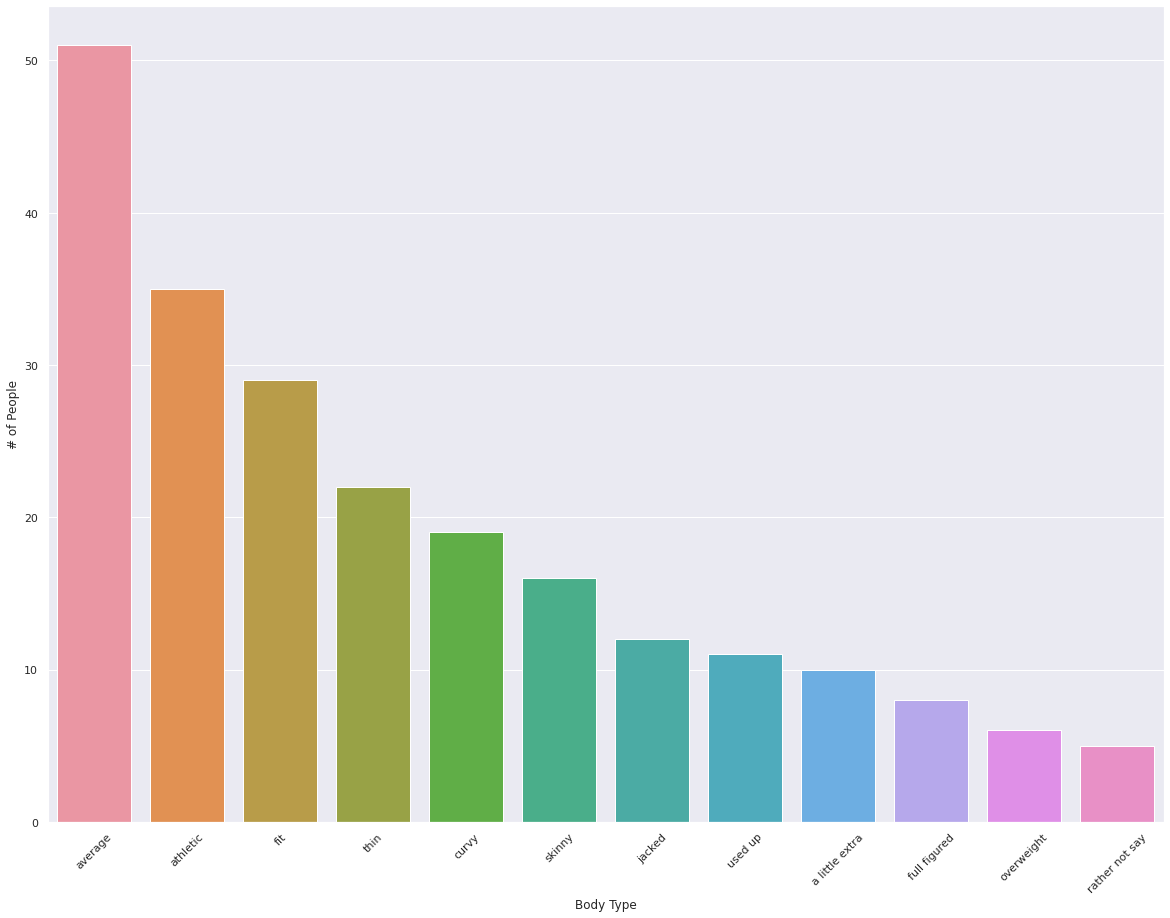

In [41]:
drinkers = df[df.drinks == 'very often']
ax = sns.countplot(x = drinkers.body_type, data = drinkers, order = drinkers['body_type'].value_counts().index)
sns.set_theme(style="darkgrid")
ax.set(xlabel='Body Type', ylabel='# of People')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=45)
plt.show()

Average dominates. "Athletic" and "Fit" make up a smaller percentage of body types. Let's try the same thing with smokers:

In [42]:
print(df.smokes.value_counts())
print(df.smokes.value_counts(normalize = True))

no                23361
sometimes          2020
when drinking      1567
yes                1167
trying to quit      776
Name: smokes, dtype: int64
no                0.808591
sometimes         0.069918
when drinking     0.054238
yes               0.040393
trying to quit    0.026860
Name: smokes, dtype: float64


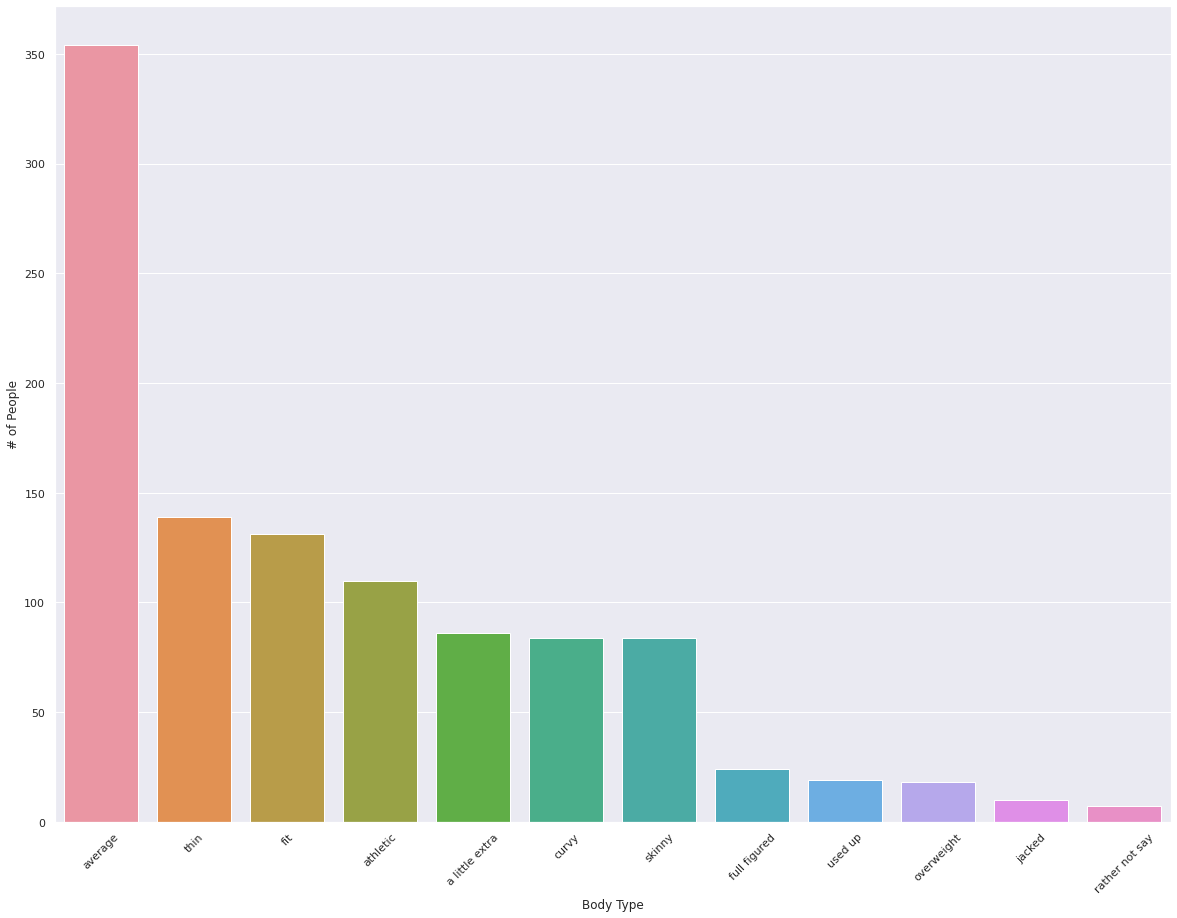

In [43]:
smokers = df[df.smokes == 'yes']
ax = sns.countplot(x = smokers.body_type, data = smokers, order = smokers['body_type'].value_counts().index)
sns.set_theme(style="darkgrid")
ax.set(xlabel='Body Type', ylabel='# of People')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=45)
plt.show()

Similar effect to drinking, but even more pronounced. There are now far more people who identify as "thin" (checks out with the fact that smoking decreases appetite, by effecting POMC cells in the hypothalamus)

Let's see if we can predict a person's education level from their writing on the essays


In [44]:
#Drop infrequent education values: 
#med school --> working on high school, 
#Keep: grad high school, 2 year, coll, masters, PHD 

In [45]:
df_education = df[(df['education'] == 'graduated from college/university') | (df['education'] == 'graduated from masters program') | (df['education'] == 'graduated from high school') | (df['education'] == 'graduated from two-year college') | (df['education'] == 'graduated from ph.d program')]
print(df_education)

       age body_type               diet    drinks  drugs  \
2       38      thin           anything  socially    NaN   
4       29  athletic                NaN  socially  never   
5       29   average    mostly anything  socially    NaN   
6       32       fit  strictly anything  socially  never   
7       31   average    mostly anything  socially  never   
...    ...       ...                ...       ...    ...   
31792   36  athletic         vegetarian  socially    NaN   
31793   33       fit  mostly vegetarian  socially  never   
31795   45   average                NaN  socially    NaN   
31796   48      thin                NaN    rarely  never   
31798   26   average    mostly anything  socially  never   

                               education  \
2         graduated from masters program   
4      graduated from college/university   
5      graduated from college/university   
6      graduated from college/university   
7      graduated from college/university   
...            

In [46]:
#Drop the columns we don't need: 
df_education.drop(['age', 'body_type', 'diet', 'drinks', 'drugs', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status','ethnicity', 'height', 'last_online'], inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df_education.reset_index(inplace = True)

In [48]:
print(df_education)

       index                          education  \
0          2     graduated from masters program   
1          4  graduated from college/university   
2          5  graduated from college/university   
3          6  graduated from college/university   
4          7  graduated from college/university   
...      ...                                ...   
19636  31792     graduated from masters program   
19637  31793     graduated from masters program   
19638  31795     graduated from masters program   
19639  31796     graduated from masters program   
19640  31798  graduated from college/university   

                                                  essay0  \
0      i'm not ashamed of much, but writing public te...   
1      hey how's it going? currently vague on the pro...   
2      i'm an australian living in san francisco, but...   
3      life is about the little things. i love to lau...   
4                                                    NaN   
...                        

In [49]:
#fill Nans on the essays
df_education['essay0'].fillna('', inplace = True)
# df_education['essay1'].fillna('', inplace = True)
# df_education['essay2'].fillna('', inplace = True)
# df_education['essay3'].fillna('', inplace = True)
#need to also change 'nan' values 
# df_education['essay0'].map({'nan': ' '})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
print(df_education['essay0'])

0        i'm not ashamed of much, but writing public te...
1        hey how's it going? currently vague on the pro...
2        i'm an australian living in san francisco, but...
3        life is about the little things. i love to lau...
4                                                         
                               ...                        
19636    i am a chicago girl living in the bay area, an...
19637    hey y'all! i'm a spicy, funny, and sometimes h...
19638    i love to be outside, explore new places and s...
19639    they say i am a complex person. it is ironic, ...
19640    as much as i love the bar and club scene, it's...
Name: essay0, Length: 19641, dtype: object


In [51]:
#Text Pre Processing

#Noise Removal to strip text of formatting for essay 0 and 2 
# import re

# for i in range(len(df_education)):
#     df_education['essay0'][i] = re.sub(r'[\.\?\!\,\:\;\"]', '', df_education['essay0'][i])
 

In [52]:
#PICKLE THE RESULT 
#Will save something as df_education_denoised.pickle in the same directory as your script 
# pickle_out = open('df_education_denoised.pickle', 'wb')
# pickle.dump(df_education, pickle_out)
# pickle_out.close()

# #De-pickle
# pickle_in = open('df_education_denoised.pickle', 'rb')
# df_education = pickle.load(pickle_in)



In [53]:
#BEfore feeding to Naive Bayes
#Tokenization 
#Stemming
#Lemmatization
#stopword removal 
#CountVectorizer 
#Naive Bayes

In [54]:
# print(df_education['essay1'][12])

In [55]:
# pip install --user -U nltk

In [56]:
# import nltk
# nltk.download('punkt')

In [57]:
#Tokenization
# from nltk.tokenize import word_tokenize

# for i in range(len(df_education)):
#     df_education['essay0'][i] = word_tokenize(df_education['essay0'][i])
 

# # ["This", "is", "a", "text", "to", "tokenize"]

In [58]:
# print(df_education['essay0'][0])

In [59]:
# #Stemmer
# from nltk.stem import PorterStemmer
  
# stemmer = PorterStemmer()


# for i in range(len(df_education)):
#     df_education['essay0'][i] = [stemmer.stem(token) for token in df_education['essay0'][i]]


In [60]:
# import nltk
# nltk.download('wordnet')
# import nltk
# nltk.download('omw-1.4')

In [61]:
# #Lemmatize
# from nltk.stem import WordNetLemmatizer
 

 
# lemmatizer = WordNetLemmatizer()
# for i in range(len(df_education)):
#     df_education['essay0'][i] = [lemmatizer.lemmatize(token) for token in df_education['essay0'][i]]



In [62]:
# df_education['essay0']

In [63]:
# #Convert column to a list
# essays = df_education['essay0'].tolist()

In [64]:
# #Flatten
# flat_essay = [item for sublist in essays for item in sublist]

In [65]:
# #Count VEctorize
# from sklearn.feature_extraction.text import CountVectorizer
# counter = CountVectorizer()
# counter.fit(flat_essay)
# print(counter.vocabulary_)


In [66]:
# training_counts = counter.transform(flat_essay)
# training_counts

In [67]:
# pd.DataFrame(training_counts.toarray(), columns=counter.get_feature_names_out())

In [68]:
print(df_education['essay0'])

0        i'm not ashamed of much, but writing public te...
1        hey how's it going? currently vague on the pro...
2        i'm an australian living in san francisco, but...
3        life is about the little things. i love to lau...
4                                                         
                               ...                        
19636    i am a chicago girl living in the bay area, an...
19637    hey y'all! i'm a spicy, funny, and sometimes h...
19638    i love to be outside, explore new places and s...
19639    they say i am a complex person. it is ironic, ...
19640    as much as i love the bar and club scene, it's...
Name: essay0, Length: 19641, dtype: object


In [69]:
essay_list = df_education['essay0'].to_list()
print(training_list[0:3])

["i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly uncomfortable. i'll try to be as\nearnest as possible in the noble endeavor of standing naked before\nthe world.<br />\n<br />\ni've lived in san francisco for 15 years, and both love it and find\nmyself frustrated with its deficits. lots of great friends and\nacquaintances (which increases my apprehension to put anything on\nthis site), but i'm feeling like meeting some new people that\naren't just friends of friends. it's okay if you are a friend of a\nfriend too. chances are, if you make it through the complex\nfiltering process of multiple choice questions, lifestyle\nstatistics, photo scanning, and these indulgent blurbs of text\nwithout moving quickly on to another search result, you are\nprobably already a cultural peer and at most 2 people removed. at\nfirst, i thought i should say as little as possible here to avoid\nyou, but that seems silly.<br />\n<br />\nas far as culture goes,

In [70]:
#Map education values to a number:

df_education["education"] = df_education["education"].astype('category')
df_education["education_cats"] = df_education["education"].cat.codes
df_education.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,income,job,education_cats
0,2,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",-1,NaN,2
1,4,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,-1,artistic / musical / writer,0
2,5,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,-1,computer / hardware / software,0
3,6,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,i like books. ones with pictures. reading them...,laughter<br />\namazing people in my life<br /...,synchronicity<br />\n<br />\nthere is this who...,plotting to take over the world with my army o...,my typical friday night,NaN,-1,NaN,0
4,7,graduated from college/university,,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN,-1,artistic / musical / writer,0


In [71]:
education_labels = df_education['education_cats'].to_list()
print(education_labels[:3])

[2, 0, 0]


In [72]:
#Split data into training and test 

from sklearn.model_selection import train_test_split


training_list, testing_list, training_labels, testing_labels = train_test_split(essay_list, education_labels, random_state = 1, test_size = .2)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

In [74]:
counter.fit(training_list)

CountVectorizer()

In [84]:
training_counts = counter.transform(training_list)
print(shape(training_counts))

NameError: ignored

#Now that we have a list of training data and training labels, we can use MultinomialNB

In [85]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()


In [86]:
classifier.fit(training_counts, training_labels)

MultinomialNB()

Now let's test on the testing set

In [88]:
#Need to turn testing_list into testing_counts

counter.fit(testing_list)
testing_counts = counter.transform(testing_list)


In [89]:
print(testing_counts[:3])

  (0, 1003)	1
  (0, 6651)	1
  (0, 8300)	1
  (0, 8858)	1
  (0, 10884)	1
  (0, 11454)	1
  (0, 12278)	1
  (0, 12588)	1
  (0, 18370)	1
  (1, 104)	1
  (1, 260)	1
  (1, 292)	1
  (1, 629)	1
  (1, 705)	1
  (1, 885)	2
  (1, 910)	1
  (1, 977)	2
  (1, 1003)	16
  (1, 1031)	1
  (1, 1091)	2
  (1, 1097)	1
  (1, 1166)	1
  (1, 1213)	3
  (1, 1292)	2
  (1, 1367)	3
  :	:
  (2, 8565)	1
  (2, 8852)	1
  (2, 9052)	1
  (2, 9829)	2
  (2, 10064)	1
  (2, 10884)	1
  (2, 11073)	1
  (2, 11619)	1
  (2, 11906)	1
  (2, 12126)	1
  (2, 12588)	1
  (2, 13512)	1
  (2, 14175)	1
  (2, 15657)	1
  (2, 16427)	1
  (2, 16453)	1
  (2, 16687)	2
  (2, 16715)	1
  (2, 16912)	5
  (2, 17143)	1
  (2, 17219)	1
  (2, 18220)	1
  (2, 18314)	1
  (2, 18363)	1
  (2, 18614)	1


In [94]:
predicted_labels = classifier.predict(testing_counts)
print(predicted_labels[:3])

[2 0 2]


Now to compare the predicted education labels from the actual labels 

#confusion matrix between testing_labels and predicted labels 

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix = confusion_matrix(testing_labels, predicted_labels)

In [107]:
print(confusion_matrix)

[[1835   37  502   75   43]
 [ 111   20    9    3    6]
 [ 582    7  316   48   19]
 [  86    2   58    9    1]
 [ 131    5   16    4    4]]


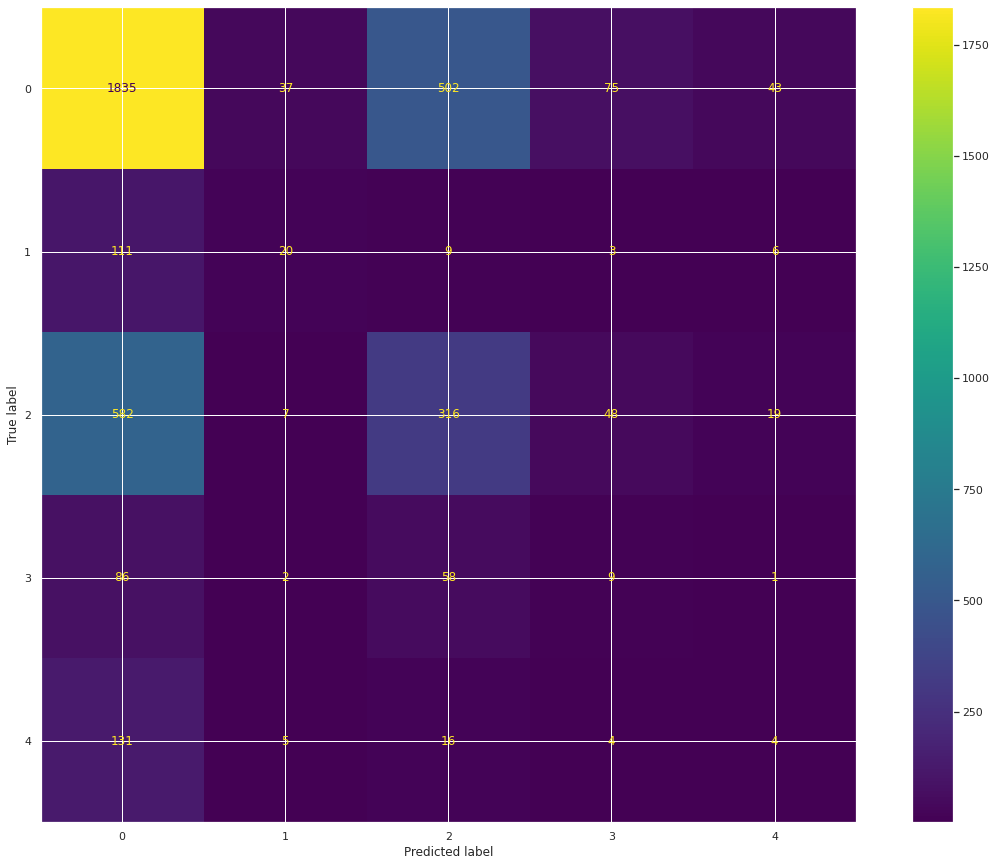

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.show()

The diagonals of the confusion matrix should be heavily populated. Unforutantely the are not. It appears that the labels at index [1], [3], and [4] are working particularly poorly 

In [117]:
# print(df_education['education'][df_education['education_cats'] == 0])
print(df_education['education'][df_education['education_cats'] == 1])

7        graduated from high school
97       graduated from high school
109      graduated from high school
137      graduated from high school
218      graduated from high school
                    ...            
19528    graduated from high school
19529    graduated from high school
19598    graduated from high school
19621    graduated from high school
19629    graduated from high school
Name: education, Length: 731, dtype: category
Categories (5, object): ['graduated from college/university', 'graduated from high school',
                         'graduated from masters program', 'graduated from ph.d program',
                         'graduated from two-year college']


College: 0
high school: 1
masters:2 
phd: 3
two-year: 4

So the algorithm is not working well on high school, PHD, and 2 year colleges. 
There are several possibilities for this, including these categories being too "close" to each other to make a difference. In the next project, we will split into 3 sections: high school, college, post-grad (Masters + PHD)  